---

## **About Author:**

---

[<img src="https://media.licdn.com/dms/image/v2/D4D03AQEsEJ_gVNnU3w/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1720678393429?e=2147483647&v=beta&t=RALfVAKvT6TmP2BBpil_CGzZK5L5ykNUou5yModXTVw" width="20%">](https://shaheer.kesug.com)

**Mr. ShaheerAli**  
*Data Scientist / ML Engineer*\
BS Computer Science

<a href="https://www.youtube.com/channel/UCUTphw52izMNv9W6AOIFGJA">
  <img width="50" height="50" src="https://img.icons8.com/color/48/youtube-play.png" alt="youtube-play"/>
</a>
<a href="https://twitter.com/__shaheerali190">
  <img width="50" height="50" src="https://img.icons8.com/dotty/80/x.png" alt="x"/>
</a>
<a href="https://www.linkedin.com/in/shaheer-ali-2761aa303/">
  <img width="50" height="50" src="https://img.icons8.com/color/48/linkedin.png" alt="linkedin"/>
</a>
<a href="https://github.com/shaheeralics">
  <img width="50" height="50" src="https://img.icons8.com/ios-glyphs/50/github.png" alt="github"/>
</a>
<a href="https://www.kaggle.com/shaheerali197">
  <img width="50" height="50" src="https://img.icons8.com/clouds/100/kaggle.png" alt="kaggle"/>
</a>

[Portfolio Site]('https://shaheer.kesug.com')

---

## **Wine Quality Prediction: Vinho Verde Wine Data**

The datasets provided contain samples of red and white Vinho Verde wines from the northern region of Portugal. The objective is to model wine quality based on physicochemical properties, as detailed in [Cortez et al., 2009] (see http://www3.dsi.uminho.pt/pcortez/wine/).

These datasets represent red and white variants of Portuguese "Vinho Verde" wine. For additional information, refer to http://www.vinhoverde.pt/en/ or the study by Cortez et al., 2009. Due to privacy and logistical constraints, the datasets include only physicochemical (input) variables and sensory (output) data, such as wine quality scores. There is no information on grape types, wine brands, or selling prices.

The data can be approached as either classification or regression tasks, with the classes being ordered but unbalanced (e.g., there are significantly more average wines than excellent or poor ones). Outlier detection techniques could be employed to identify the few instances of exceptional or substandard wines. Furthermore, the relevance of all input variables is not guaranteed, suggesting that feature selection methods could be valuable for identifying the most important factors.

### **Input Variables (based on physicochemical tests):**

>1. Fixed acidity
>2. Volatile acidity
>3. Citric acid
>4. Residual sugar
>5. Chlorides
>6. Free sulfur dioxide
>7. Total sulfur dioxide
>8. Density
>9. pH
>10. Sulphates
>11. Alcohol

### **Output Variable (based on sensory data):**

>12. Quality (score ranging from 0 to 10)

For access to the dataset, visit: [Wine Quality Dataset on Kaggle](https://www.kaggle.com/datasets/joebeachcapital/wine-quality/data?select=winequality.names).

# Importing Libraries:

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# importing baging libraries
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

# importing boosting libraries
# scikit-learn
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# XGBoost
from xgboost import XGBClassifier, XGBRegressor
# LightGBM
from lightgbm import LGBMClassifier, LGBMRegressor
# CatBoost
from catboost import CatBoostClassifier, CatBoostRegressor

# importing stacking libraries
from sklearn.ensemble import StackingClassifier, StackingRegressor




# Loading the Datasets:

In [3]:
# loading the dataset

df = pd.read_csv("../../../../datasets/wine quality/winequality-red.csv",sep=';')


# Exploring the Data:

In [4]:
# checking the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Counting the number of Each Quality wine Data:

C:\Users\data_scientist\AppData\Local\Temp\ipykernel_7692\1207201200.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df , x='quality', palette='Set1')


<Axes: xlabel='quality', ylabel='count'>

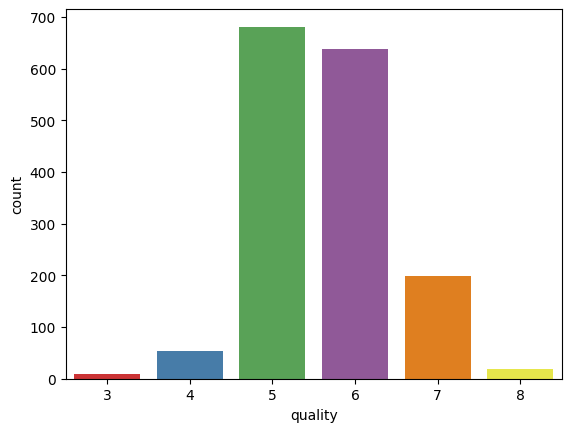

In [9]:
sns.countplot(df , x='quality', palette='Set1')

In [10]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Data Cleaning:

## **Checking the Missing Values**

In [11]:
df.isnull().sum() / len(df)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

## **Checking the The Transformation of the Dataset:**

In [12]:
# checking the transformation of the dataset(all columns in the plot.express)
# Create a subplot grid
# Create a subplot grid

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

fig = make_subplots(rows=3, cols=4, subplot_titles=df.columns)

# Add a boxplot for each column in the grid
for i, col in enumerate(df.columns):
    row = (i // 4) + 1  # Row index (starting from 1)
    col_pos = (i % 4) + 1  # Column index (starting from 1)
    
    fig.add_trace(
        go.Histogram(x=df[col], name=col),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(height=1400, width=1400, title_text="Boxplots for Each Column", showlegend=False)

# Show the plot
fig.show()


From the following code we shall check that which transformation is good for 

**fixed acidity** = log transformation\
**volatile acidity** = yeo johnson transformation\
**citric acid** = square root\
**residual sugar** = yeo johnson transformation\
**cholorides** = log transofrmation\
**free sulphur dioxide** = box cox transformation\
**total sulphur dioxide** = box cox transformation\
**density** = box cox transformation \
**pH** = log transformation\
**sulphates** = box cox transformation\
**alcohol** = box cos transoformation


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, yeojohnson
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame

# Function to plot original and transformed distributions
def plot_transformations(column, original, transformed, method):
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'Original {column}', f'{method} Transformation {column}'))
    
    fig.add_trace(go.Histogram(x=original, nbinsx=30, name='Original', marker_color='blue'), row=1, col=1)
    fig.add_trace(go.Histogram(x=transformed, nbinsx=30, name='Transformed', marker_color='green'), row=1, col=2)
    
    fig.update_layout(title_text=f'{column} Distribution', showlegend=False)
    fig.show()

# Dictionary of columns and their respective transformations
transformations = {
    'fixed acidity': 'log',
    'volatile acidity': 'yeojohnson',
    'citric acid': 'sqrt',
    'residual sugar': 'yeojohnson',
    'chlorides': 'log',
    'free sulfur dioxide': 'boxcox',
    'total sulfur dioxide': 'boxcox',
    'density': 'boxcox',
    'pH': 'log',
    'sulphates': 'boxcox',
    'alcohol': 'boxcox'
}

# Applying the transformations
for col, method in transformations.items():
    original_data = df[col].dropna()  # Original data without NaN values

    if method == 'log':
        # Applying log transformation (adding a small constant to avoid log(0))
        transformed_data = np.log(df[col] + 1e-5)
        df[col] = transformed_data
        plot_transformations(col, original_data, transformed_data, 'Log')

    elif method == 'sqrt':
        # Applying square root transformation
        transformed_data = np.sqrt(df[col])
        df[col] = transformed_data
        plot_transformations(col, original_data, transformed_data, 'Square Root')

    elif method == 'boxcox':
        # Applying Box-Cox transformation (Box-Cox requires all positive values)
        if (df[col] > 0).all():
            transformed_data, _ = boxcox(df[col] + 1e-5)  # adding small value to handle zero values
            df[col] = transformed_data
            plot_transformations(col, original_data, transformed_data, 'Box-Cox')
        else:
            print(f"Box-Cox transformation not applicable for {col} due to non-positive values.")

    elif method == 'yeojohnson':
        # Applying Yeo-Johnson transformation (can handle zero and negative values)
        transformed_data, _ = yeojohnson(df[col])
        df[col] = transformed_data
        plot_transformations(col, original_data, transformed_data, 'Yeo-Johnson')

# Display the transformed DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001481,0.434520,0.000000,0.434345,-2.576890,2.867880,3.861489,-0.002212,1.255619,-0.801380,0.300481,5
1,2.054125,0.498508,0.000000,0.454268,-2.322686,4.102516,4.686832,-0.003237,1.163154,-0.476611,0.300504,5
2,2.054125,0.457142,0.200000,0.447288,-2.385858,3.317113,4.421288,-0.003031,1.181730,-0.546226,0.300504,5
3,2.415915,0.224548,0.748331,0.434345,-2.590134,3.504204,4.550627,-0.002008,1.150575,-0.737618,0.300504,6
4,2.001481,0.434520,0.000000,0.434345,-2.576890,2.867880,3.861489,-0.002212,1.255619,-0.801380,0.300481,5


## **Now we have to check the ouliers in the dataset:**

In [14]:
df.shape

(1599, 12)

In [15]:
# Create a subplot grid
fig = make_subplots(rows=3, cols=4, subplot_titles=df.columns)

# Add a boxplot for each column in the grid
for i, col in enumerate(df.columns):
    row = (i // 4) + 1  # Row index (starting from 1)
    col_pos = (i % 4) + 1  # Column index (starting from 1)
    
    fig.add_trace(
        go.Box(y=df[col], name=col),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(height=1400, width=1400, title_text="Boxplots for Each Column")

# Show the plot
fig.show()


In [16]:
# making a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df

# now removing outliers
for col in df.columns:
    df = remove_outliers(df, col)
    
# Display the shape of the DataFrame after removing outliers
df.shape

(1347, 12)

In [17]:
# Create a subplot grid
fig = make_subplots(rows=3, cols=4, subplot_titles=df.columns)

# Add a boxplot for each column in the grid
for i, col in enumerate(df.columns):
    row = (i // 4) + 1  # Row index (starting from 1)
    col_pos = (i % 4) + 1  # Column index (starting from 1)
    
    fig.add_trace(
        go.Box(y=df[col], name=col),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(height=1400, width=1400, title_text="Boxplots for Each Column")

# Show the plot
fig.show()


## **Checking the Correlation of the Data:**

In [18]:
df_corr = df.corr()

<Axes: >

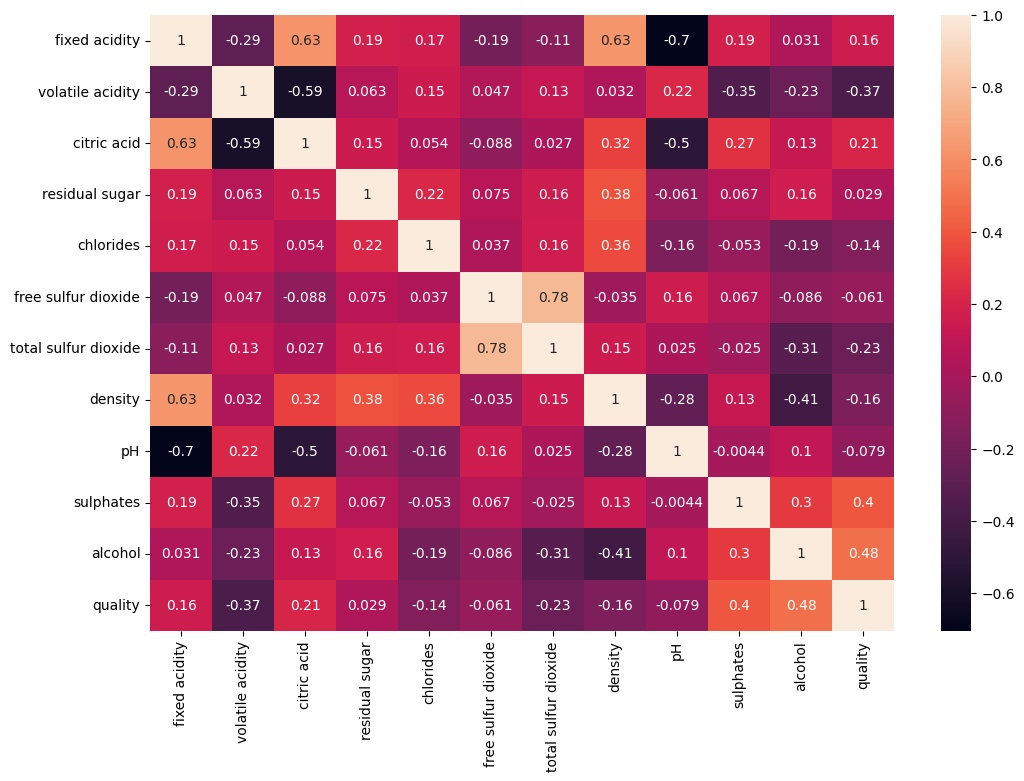

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True)

# **Training the Model:**

In [21]:
# now we will split the data into features and target

X = df.drop('quality', axis=1)
y = df['quality']

# now we will split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Bagging Classification Models:

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# importing baging libraries
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

# importing boosting libraries
# scikit-learn
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# XGBoost
from xgboost import XGBClassifier, XGBRegressor
# LightGBM
from lightgbm import LGBMClassifier, LGBMRegressor
# CatBoost
from catboost import CatBoostClassifier, CatBoostRegressor

# importing stacking libraries
from sklearn.ensemble import StackingClassifier, StackingRegressor


